In [6]:
import sympy as sp

In [1]:
from fermi_model import *
states3 = csv_to_states()

In [2]:
def sum_along_axis(matrix: NDArray[np.float64], axis: int = 0):
    return np.apply_along_axis(np.sum, axis, matrix)

In [3]:
fermi = Fermi(states3, equ=False, Te=0.5, ne=0.1)

if np.all(fermi.excitation == 0):
    fermi._make_matrices()
C_ = np.diag(sum_along_axis(fermi.excitation, 1))
F_ = np.diag(sum_along_axis(fermi.deexcitation, 0))
C = fermi.excitation
F = fermi.deexcitation
coeff = C_ - F - C.T + F_
if not fermi.equ:
    A_ = np.diag(sum_along_axis(fermi.emission, 0))
    A = fermi.emission
    coeff += A_ - A
fermi.coeff = coeff

normalized = -coeff / np.max(np.abs(np.diag(coeff))) + np.eye(C.shape[0])

In [15]:
def power_method(matrix):
    x = np.zeros(matrix.shape[0])
    x[0] = 1
    eigen_past = 0
    while True:
        y = np.dot(matrix, x)
        eigen = np.dot(y, y) / np.dot(y, x)
        if np.abs(eigen_past - eigen) < 1e-15:
            return x, eigen
        x = y / np.linalg.norm(y)
        eigen_past = eigen

def power_method_2(matrix):
    x = np.zeros(matrix.shape[0])
    x[0] = 1
    eigen_past = 0
    while True:
        y = np.dot(matrix, x)
        eigen = np.linalg.norm(y)
        if np.abs(eigen_past - eigen) < 1e-15:
            return x, eigen
        x = y / eigen
        eigen_past = eigen

In [18]:
%%time
solution, eigen = power_method(normalized)
print(solution, eigen)

[9.99921729e-01 1.25075360e-02 2.19525902e-04 2.19265948e-04
 7.57406112e-06 8.69729862e-06 7.56174481e-06 3.70827375e-07
 4.60194715e-07 9.08649092e-08 4.59921446e-07 2.23444506e-08
 2.84718346e-08 4.88826461e-09 3.19431456e-08 4.88624493e-09
 1.54409262e-09 1.97057671e-09 3.15540575e-10 9.21236088e-11
 2.36588076e-09 3.34886217e-10 9.19882707e-11 1.17595475e-10
 1.48647234e-10 2.27291391e-11 5.76264986e-12 1.84890772e-10
 2.53667374e-11 6.13176396e-12 6.12489458e-12 9.62986289e-12
 1.20022969e-11 1.77217067e-12 4.15350009e-13 2.19880127e-13
 1.51639793e-11 2.03304514e-12 4.41207468e-13 4.60254632e-13
 2.63779639e-13 8.34216488e-13 1.02372980e-12 1.46919511e-13
 3.26846665e-14 1.54016602e-14 1.29877035e-12 1.70607904e-13
 3.51568936e-14 1.70517190e-14 3.72297031e-14 1.91685122e-14
 2.54486821e-15 7.55848078e-14 9.13315146e-14 1.27963391e-14
 2.73944667e-15 1.20189087e-15 8.16731372e-16 1.15595910e-13
 1.49021309e-14 2.96793114e-15 1.29993492e-15 3.17314731e-15
 1.53087202e-15 1.096496

In [19]:
%%time
solution2, eigen2 = power_method_2(normalized)
print(solution2, eigen2)

[9.99921729e-01 1.25075734e-02 2.19525963e-04 2.19266010e-04
 7.57406308e-06 8.69729867e-06 7.56174677e-06 3.70827470e-07
 4.60194717e-07 9.08651293e-08 4.59921448e-07 2.23444563e-08
 2.84718347e-08 4.88827735e-09 3.19431456e-08 4.88625766e-09
 1.54409301e-09 1.97057672e-09 3.15541412e-10 9.21236323e-11
 2.36588076e-09 3.34887160e-10 9.19882941e-11 1.17595505e-10
 1.48647235e-10 2.27291997e-11 5.76265134e-12 1.84890772e-10
 2.53668102e-11 6.13176561e-12 6.12489622e-12 9.62986532e-12
 1.20022969e-11 1.77217541e-12 4.15350115e-13 2.19880179e-13
 1.51639793e-11 2.03305101e-12 4.41207587e-13 4.60254757e-13
 2.63779640e-13 8.34216699e-13 1.02372980e-12 1.46919904e-13
 3.26846750e-14 1.54016639e-14 1.29877035e-12 1.70608398e-13
 3.51569032e-14 1.70517232e-14 3.72297133e-14 1.91685124e-14
 2.54487421e-15 7.55848269e-14 9.13315149e-14 1.27963734e-14
 2.73944737e-15 1.20189116e-15 8.16731565e-16 1.15595910e-13
 1.49021741e-14 2.96793195e-15 1.29993524e-15 3.17314819e-15
 1.53087203e-15 1.096496

In [25]:
a = np.array([1,3,4,5])
print(np.linalg.norm(a))
print(np.dot(a, a)**0.5)

7.14142842854285
7.14142842854285


In [3]:
equ = False
Te = 0.5
ne = 0.001

fermi_LA = Fermi(states3, equ=equ, Te=Te, ne=ne)
scores, population = fermi_LA.calc_distribution()
x = fermi_LA._solve_equation()

In [4]:
fermi_power = Fermi(states3, equ=equ, Te=Te, ne=ne)
scores_power, population_power = fermi_power.calc_distribution(use_power=True)
x_power = fermi_power._solve_equation(use_power=True)

fermi_power_equ = Fermi(states3, equ=True, Te=Te, ne=1000000)
scores_power_equ, population_power_equ = fermi_power_equ.calc_distribution(use_power=True)
x_power_equ = fermi_power_equ._solve_equation(use_power=True)

fermi_equ = Fermi(states3, equ=True, Te=Te, ne=1000000)
scores_equ, population_equ = fermi_equ.calc_distribution(use_power=False)
x_equ = fermi_equ._solve_equation(use_power=False)

In [6]:
print("excitation matrix: {:.20g}".format(np.max(fermi_LA.excitation)))
print("excitation matrix(/ne): {:.20g}".format(np.max(fermi_LA.excitation / fermi_LA.ne)))
print("deexcitation matrix: {:.20g}".format(np.max(fermi_LA.deexcitation)))
print("emission matrix(mean): {:.20g}".format(np.mean(fermi_LA.emission)))
print("emission matrix(max): {:.20g}".format(np.max(fermi_LA.emission)))
print('''
excitation, deexcitationはneの桁数に比例して桁数が小さくなっていくだけ。
emissionはneに関係なく常にこの値。
''')

excitation matrix: 0.00013533528323661270275
excitation matrix(/ne): 0.13533528323661270232
deexcitation matrix: 0.0010000000000000000208
emission matrix(mean): 17.124840048687619998
emission matrix(max): 8000

excitation, deexcitationはneの桁数に比例して桁数が小さくなっていくだけ。
emissionはneに関係なく常にこの値。



In [35]:
a = np.longdouble(0.1)
b = np.longdouble(0.1)
c = np.longdouble(0.1)
a + b + c

0.30000000000000004

In [14]:
coeff = fermi_LA.coeff
excitation = fermi_LA.excitation
deexcitation = fermi_LA.deexcitation
emission = fermi_LA.emission
C_ = np.diag(sum_along_axis(excitation, 1))
A_ = np.diag(sum_along_axis(deexcitation, 0))
F_ = np.diag(sum_along_axis(emission, 0))
normalized = -coeff / np.max(np.abs(np.diag(coeff))) + np.eye(coeff.shape[0])

In [15]:
print('''coeffを正規化したときの対角成分の絶対値の最大値(単位行列を足す前): 
                    ''',
      np.max(np.diag(coeff / np.max(np.abs(np.diag(coeff))))))

coeffを正規化したときの対角成分の絶対値の最大値(単位行列を足す前): 
                     1.0


In [16]:
# diagonal = np.abs(np.diag(normalized))
diagonal = np.diag(normalized)
print(np.min(diagonal))

0.0


In [17]:
coeff_abs = np.abs(coeff)
coeff_larger_zero = coeff_abs[coeff_abs > 0]

In [18]:
print("min in coeff_abs: {:.25g}".format(np.min(coeff_larger_zero)))
print("max in coeff: {:.25g}".format(np.max(coeff_larger_zero)))
print("max in excitation: ", np.max(excitation))

min in coeff_abs: 4.248354255291589244103453e-21
max in coeff: 44100.01999999999679857865
max in excitation:  0.0001353352832366127


In [19]:
# どこでcoeffは最大値をとるのかを特定し、44100.01999999が誤差なのかどうかを見極める
max_loc = np.unravel_index(np.argmax(coeff), coeff.shape)

In [20]:
print("{:.25g}".format(coeff[max_loc]))
print("{:.25g}".format(excitation[max_loc]))
print("{:.25g}".format(deexcitation[max_loc]))
print("{:.25g}".format(emission[max_loc]))
print("{:.25g}".format(C_[max_loc]))
print("{:.25g}".format(A_[max_loc]))
print("{:.25g}".format(F_[max_loc]))

44100.01999999999679857865
0
0
0
0
0.02000000000000000041633363
44100


In [21]:
a = A_ + F_
a[max_loc]

44100.02

In [22]:
print("max in coeff: {:.25g}".format(coeff[max_loc]))

max in coeff: 44100.01999999999679857865


In [24]:
print("{:.25g}".format(44100.0 + 0.0200000000000000004))

44100.01999999999679857865


In [25]:
# excitationの0より大きい要素の最小値は何か
print("excitationの0より大きい要素の最小値: {:.25g}".format(np.min(excitation[excitation > 0])))

excitationの0より大きい要素の最小値: 4.248354255291589244103453e-21


In [26]:
# 最大の総エネルギー(score)差があるときexcitationの値は最小になる
print("最大の総エネルギー差におけるexcitationの要素の値: ", ne * np.exp(-(23-3)/Te))

最大の総エネルギー差におけるexcitationの要素の値:  4.248354255291589e-21


In [27]:
normalized_min = np.min(normalized[normalized > 0])
print("normalizedの正の最小値: {:.25g}".format(normalized_min))
print("normalizedの最大値: {:.25g}".format(np.max(normalized)))

print("\nnormalizedの最大値は、coeffの対角成分が最も小さかった要素の位置に存在する")

normalizedの正の最小値: 9.633451992292950364035453e-26
normalizedの最大値: 0.9999999959055183573752856

normalizedの最大値は、coeffの対角成分が最も小さかった要素の位置に存在する


## 実験結果
---
* 当たり前やけど、coeffの中で絶対値が最小の正の要素はexcitationの最小の正の要素と値が等しい
* emissionの計算では計算誤差はない(intなので。)
* $n_e=0.001$のとき、coeffの中で最小値は10^-21のオーダーだが最大値は44100.01999999999679857865という値
  * 最大値の 019999999 のとこは 02 の計算誤差っぽいけど、この計算誤差のオーダーよりexcitationの最小値の値のほうが小さい。つまりexcitationの値に対して計算誤差のオーダーがかなり大きい。
  * excitationの最小値のオーダーはやたら小さいが、これは $ \exp(-(23-3)/T_e) $ (総エネルギー差が最大の時excitationの値は最小値をとる)の計算結果なので、0の誤差とかではない
* normalizedの最小値は 9.633451992292950364035453e-26
* normalizedの最大値は 0.9999999959055183573752856
  * = (単位行列) - (coeffの対角成分の最小値)
* coeffを対角成分の最大値で正規化したときの対角成分の最大値はちゃんと1になっていた。
  * 割り算の部分では基本的に計算誤差は起こっていないものとみてよさそう

<br>

* np.linalg.norm()は信頼していい

In [28]:
# coeffの最大値は 44100.0199999999なので、どこから計算誤差が生まれているのかを検証する

coeff_max_loc: tuple = list(zip(*np.where(coeff == np.max(coeff))))[0]
print(coeff_max_loc)  # (314, 314)

# 対角成分で計算誤差が生じている

(314, 314)


In [43]:
# C_ = np.diag(excitation.sum(axis=1))
C_ = np.diag(Fermi.sum_along_axis(excitation, 1))
# F_ = np.diag(deexcitation.sum(axis=0))
F_ = np.diag(Fermi.sum_along_axis(deexcitation, 0))
# A_ = np.diag(emission.sum(axis=0))
A_ = np.diag(Fermi.sum_along_axis(emission, 0))

In [29]:
print("これが誤差を生んでる原因")
print("deexcitation.sum(axis=0)[314]: ", deexcitation.sum(axis=0)[314])
print("np.sum(deexcitation[:, 314]): ", np.sum(deexcitation[:, 314]))

これが誤差を生んでる原因
deexcitation.sum(axis=0)[314]:  0.02000000000000001
np.sum(deexcitation[:, 314]):  0.02


<br>
<br>

## 計算誤差の削減にやったこと
---
* `ndarray.sum(axis=0)`や`np.sum(ndarray, axis=0)`ではF_の計算時に誤差が出たため、新たに`sum_along_axis()`を定義し、メソッド内部ではnumpyの`np.apply_along_axis()`を使用
    * `ndarray.sum(axis=0)`では、0.02となるべきところで、0.02000000000000001という誤差が生じた
    * この誤差はexcitationの要素の値に比べるとかなり大きいオーダー

<br>

* べき乗法で返す値が間違っていたので修正
  * `x`を返すべきなのに、`y=A^(k+1)@x`を返してた。。
<br>

## 解決していない問題点
---
* べき乗法では誤差が大きい
  * 固有値が 1 となってほしいところが、0.999999999946445283782736623834となる(eigen - eigen_pastが1e-15未満になったときに終了)
  * (eigen - eigen_past) の条件をもっと厳しくすればいいかもしれへんけど、この時点で実行時間が1min超えてくるからこれより厳しくするのは時間的に厳しい

<br>

* `np.linalg.eig()` を使用すると誤差が大きそう
  * 固有ベクトルの各値にどの程度誤差があるのかはわからない。
  * 固有値は 1.00000000000000044408920985006 となったので、誤差のオーダーは15桁なので、べき乗法よりは誤差は小さそう。
  * `eig()`を使うと固有値は 1.0000000000000004 となるが、`eigvals()`を使うと、0.9999999999999998 と求まる。両方numpyを使ってるのに計算誤差の起こり方が違う
  * `np.linalg.eig()`を使ったときも、最後に `return x / np.sum(x)` してるのに、`np.sum(x)`すると0.99999999999999988898となり、合計値が1にならない
    * 占有密度の合計がぴったり100%にはならない

<br>

* `np.linalg.eig()` を使ったときとべき乗法で求めたときの占有密度分布の形がかなり異なる
  * **どっちが正しいかは `np.dot(coeff, x)` でどちらが零ベクトルとの誤差が小さいかで判断すればよいのでは？**
    * 結果としては、`np.linalg.eig()`を用いたほうが零ベクトルとの誤差が小さい(平均値や分散が小さい)が、グラフを見た感じでは、`power_method()`使ったほうが正しそうな気がする。
    * 最小値は`power_method()`を使ったほうが小さい。ただ絶対値が大きいものがいくつかあるのが気になる。
  * **べき乗法を高速化したいなぁ**

<br>

## **やりたいこと**
---
* **べき乗法の高速化**
* **平衡状態での、総エネルギーが4のときの凹みの検証**
  * これは藤井先生の方法で検証したらそれが正しいのかおかしいのかがわかるかも

<br>

* sympy使う → 遅すぎるからなぁ...
* float64 -> float128を使う
  * メモリを2倍食うから重そう。やってみてもいいけど変わるかは怪しい。floatで表せる最大桁よりももっと大きい桁のオーダーで誤差が生まれているから。


<br>
<br>
<br>

In [30]:
print("np.linalg.eig()を使った固有値の計算結果(expected 1)")
print("{:.30g}".format(fermi_LA.eigen))

np.linalg.eig()を使った固有値の計算結果(expected 1)


AttributeError: 'Fermi' object has no attribute 'eigen'

In [ ]:
print("べき乗法を使った固有値の計算結果(expected 1)")
print("{:.30g}".format(fermi_power.eigen))

べき乗法を使った固有値の計算結果(expected 1)
0.999999999946445283782736623834


In [ ]:
print("np.linalg.eig()で求めた固有値: ", np.max(np.linalg.eig(normalized)[0]))
print("np.linalg.eigvals()で求めた固有値: ", np.max(np.linalg.eigvals(normalized)))
print("求めたいんは固有ベクトルやから、結局使うのはeig()の方やけど")

np.linalg.eig()で求めた固有値:  1.0000000000000004
np.linalg.eigvals()で求めた固有値:  0.9999999999999998
求めたいんは固有ベクトルやから、結局使うのはeig()の方やけど


In [31]:
# np.linalg.norm()を使った計算
print("{:.30g}".format(np.linalg.norm(normalized@x)))

# 自分でノルムを計算した結果
eigen = normalized@x
sum_square = 0
for val in eigen:
    sum_square += val**2
print("{:.30g}".format(sum_square**0.5))
print("np.linalg.norm()は信頼できる")

0.999855183356966326080339513283
0.999855183356966215058037050767
np.linalg.norm()は信頼できる


In [32]:
print("{:.20g}".format(np.sum(x)))

0.99999999999999988898


In [33]:
print("{:.20g}".format(np.sum(x_power)))

1


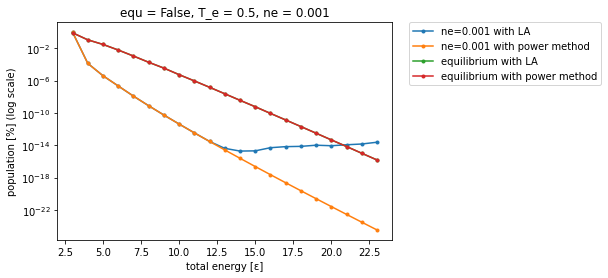

In [34]:
plt.plot(scores, population, label="ne=0.001 with LA", marker='.')
plt.plot(scores_power, population_power, label="ne=0.001 with power method", marker='.')
plt.plot(scores_equ, population_equ, label="equilibrium with LA", marker='.')
plt.plot(scores_power_equ, population_power_equ, label="equilibrium with power method", marker='.')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.title(f"equ = {equ}, T_e = {Te}, ne = {ne}")
plt.yscale("log")
# plt.ylim(1e-30, 5)
plt.xlabel("total energy [ε]")
plt.ylabel("population [%] (log scale)")
plt.show()

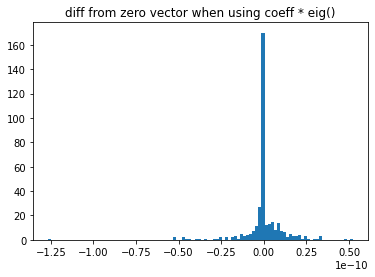

In [39]:
diff_LA = np.dot(coeff, x)
plt.title("diff from zero vector when using coeff * eig()")
plt.hist(diff_LA, bins=100)
plt.show()

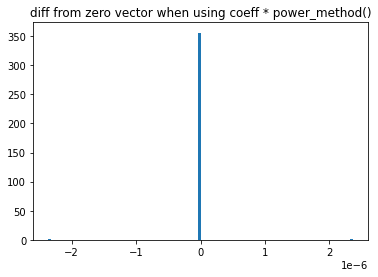

In [36]:
diff_power = np.dot(coeff, x_power)
plt.title("diff from zero vector when using coeff * power_method()")
plt.hist(diff_power, bins=100)
plt.show()

In [37]:
np.min(np.abs(diff_power))

1.1748385606572143e-39

In [40]:
np.min(np.abs(diff_LA))

1.6630037989373106e-24

In [41]:
np.var(diff_power)

3.1160047051451295e-14

In [42]:
np.var(diff_LA)

1.7871027740263767e-22

In [49]:
xs = np.arange(5, 24)
func = lambda x: 3*x**2 - 21*x + 37
ys = func(xs)

In [50]:
ys

array([   7,   19,   37,   61,   91,  127,  169,  217,  271,  331,  397,
        469,  547,  631,  721,  817,  919, 1027, 1141])

In [51]:

xs


array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23])

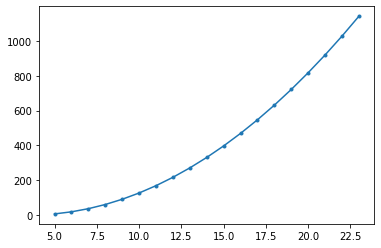

In [53]:
plt.plot(xs, ys, marker='.')
plt.show()